# **CS412 - Machine Learning - 2022**
## Homework 1
100 pts


## **Goal**

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with the Sklearn library
*   Learn which evaluation metric to choose in different scenarios

## **Dataset**
**JOB-A-THON - March 2022** Dataset contains the customer demographics and past activity with the bank. There is also the target label representing whether the customer will churn (stop working with the bank) or not.

Dataset is taken from: https://www.kaggle.com/datasets/gauravduttakiit/jobathon-march-2022

**Download the data from SuCourse**

## **Task**
Build a kNN and decision tree classifiers with the scikit library function calls to predict customer churn. Is_Churn is the target variable while the others will be used as features ('Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category').

## **Software**: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## **Submission**: 
Name this notebook as: **YourName_Surname_hw1.ipynb** from the top left corner (e.g. for Özgür Can Seçkin -> Ozgur_Can_Seckin_hw1.ipynb)
Next, download this notebook as a *.ipynb document and upload* it on SuCourse. Also, click on the **"Share"** button on the top right hand side of the page and swicth from **"restricted" to "Anyone with the Link"** under the **"Get Link"** title. Then, **copy the link and paste it on the assignment's comment.**

If necessary, see the first recitation under Week 4 to get a tutorial on how to share your Colab link and how to download the .ipynb file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Provide the Colab Link Here**:
https://colab.research.google.com/drive/1Nv4PHOIVLiFjWC470D0Cdd8u8t0dzyFp?usp=sharing

##**1) Initialize**

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


##**2) Load training dataset** *(5 pts)*

Read the csv file:



In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 


# Read data
df = pd.read_csv("train_hw1.csv")
df





,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**3) Understanding the dataset** *(5 pts)*

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***(shape function can be used)***

- Get a quick summary of the data **(info can be used)**

- Display the first 5 rows from training dataset ***(head or sample functions can be used)***


Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system.


In [3]:
# print shape
print('Data Dimensionality: ')
df.shape


# print the summary for each column
print('Data Summary: ')
df.info("Data Dimensionality")



# print first 5 rows in your dataset
print('Head of Data: ',df.head(5))






Data Dimensionality: 
Data Summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB
Head of Data:           ID  Age  Gender         Income     Balance  Vintage  \
0  84e2fcc9   36  Female       5L - 10L   563266.44        4   
1  57fea15e 

##**4) Seperate X and y Values** *(5 pts)*
First, you have to seperate X (features or independent variables) from y (target variable or dependent variables).

Note that our **dependent variable** is *'Is_Churn'* while the **independent variables** are: *'Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category'*

*Hint: You can use drop method when defining X*

In [4]:
# Drop ID column:
df = df.drop(columns=['ID'])

# Define X:
#X = df['Age','Gender','Income','Balance','Vintage','Transaction_Status','Product_Holdings','Credit_Card','Credit_Category']

# Define y:
#y = df['Is_Churn']

# Define X:
X = df.drop(columns=['Is_Churn'])

# Define y:
y = df['Is_Churn']

X


,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor
4,39,Female,More than 15L,893146.23,1,1,1,1,Good
...,...,...,...,...,...,...,...,...,...
6645,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor
6646,42,Female,5L - 10L,596286.54,3,1,2,1,Average
6647,29,Male,Less than 5L,979298.19,2,0,2,0,Poor
6648,66,Female,10L - 15L,395233.65,3,0,2,1,Poor


In [ ]:
y

0       1
1       0
2       0
3       1
4       1
       ..
6645    1
6646    0
6647    0
6648    1
6649    0
Name: Is_Churn, Length: 6650, dtype: int64

##**5) Train - Test Split** *(5 pts)*
Since you will be going to apply cross validation, you do not need to use a validation set for now.

In [6]:
from sklearn.model_selection import train_test_split

# Split 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80% training set, 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





##**6) Transform Features Into Numerical Format** *(10 pts)*
You can take:
*   Gender information as a binary variable
*   Income and Credit_Category as ordinal variables

The dictionaries that you are going to use are given below:

In [7]:
gender_map = {'Female':1, 'Male': 0}

Income_map = {'Less than 5L': 1, 
              '5L - 10L': 2,
              '10L - 15L': 3,
              'More than 15L': 4}
              
Credit_Category_map = {'Poor': 1,
                       'Average': 2,
                       'Good': 3}

Product_Holdings_map = {'3+': 3}

# You can use replace method to replace the values on training and test sets:
X_train.replace({'Gender': gender_map, 'Income': Income_map, 'Credit_Category': Credit_Category_map, 'Product_Holdings': Product_Holdings_map}, inplace = True)
X_test.replace({'Gender': gender_map, 'Income': Income_map, 'Credit_Category': Credit_Category_map, 'Product_Holdings': Product_Holdings_map}, inplace = True)

X_train
#X_train = X_train.replace({"Gender": gender_map})
#X_train = X_train.replace({"Income": Income_map})
#X_train = X_train.replace({"Credit_Category": Credit_Category_map})
#X_train = X_train.replace({"Product_Holdings": Product_Holdings_map})
#X_test = X_test.replace({"Gender": gender_map})
#X_test = X_test.replace({"Income": Income_map})
#X_test = X_test.replace({"Credit_Category": Credit_Category_map})
#X_test = X_test.replace({"Product_Holdings": Product_Holdings_map})
#X_val = X_val.replace({"Gender": gender_map})
#X_val = X_val.replace({"Income": Income_map})
#X_val = X_val.replace({"Credit_Category": Credit_Category_map})
#X_val = X_val.replace({"Product_Holdings": Product_Holdings_map})

# y_train = y_train.replace({"Gender": gender_map})
# y_train = y_train.replace({"Income": Income_map})
# y_train = y_train.replace({"Credit_Category": Credit_Category_map})
# y_train = y_train.replace({"Product_Holdings": Product_Holdings_map})
# y_test = y_test.replace({"Gender": gender_map})
# y_test = y_test.replace({"Income": Income_map})
# y_test = y_test.replace({"Credit_Category": Credit_Category_map})
# y_test = y_test.replace({"Product_Holdings": Product_Holdings_map})
# y_val = y_val.replace({"Gender": gender_map})
# y_val = y_val.replace({"Income": Income_map})
# y_val = y_val.replace({"Credit_Category": Credit_Category_map})
# y_val = y_val.replace({"Product_Holdings": Product_Holdings_map})

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
3759,31,1,2,810212.13,5,0,1,1,1
2728,37,1,1,480472.92,2,1,2,0,2
1632,30,0,2,700588.71,1,0,2,1,1
555,66,0,4,559805.67,3,1,2,1,3
4577,41,0,3,856706.13,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...
3772,34,1,3,2059525.53,0,1,1,1,1
5191,47,0,4,482473.53,3,0,2,1,2
5226,68,1,4,1290666.87,3,1,1,0,1
5390,46,1,1,1052511.84,4,0,2,1,2


##**7) Select the Best Evaluation Metric** *(25 pts)*
Since our bank is very risk averse, it tries to minimize the number of credits that we call "good" but actually are "bad".

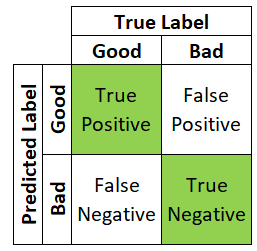

Which of the following performance metric should we employ in order to select the best model? (You can use the table above) Please write down the correct answer below (under **YOUR ANSWER HERE**) and explain your reasoning in one or two sentences.

1.   Accuracy
2.   Precision
3.   Recall

### YOUR ANSWER HERE:
We choose to use accuracy because accuracy is the measurement which we use  to determine to best identification for the relationship between variables and database based on the training data. Predicted   label will be TP and  FP.


##**8) Train a decision tree classifier on train data and do model selection using the validation data** *(30 pts)*

* Set number of folds in cross validation as 5 *(5 pts)*
* Set scoring parameter to what you have determined in the last question as `scoring = '...'` *(5 pts)*
* Use grid_search to apply hyperparameter tuning on decision tree classifier with max_depth = 3, 5, 7, 9, 11 *(10 pts)*
* Plot the validation set performance metrics for these settings where x axis denotes the max_depth values and validation performance metrics are on y axis. *(10 pts)*

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas.core.common import random_state

# Train decision tree classifiers

#parameters_tree_grid = {"n_neighbours":[3, 5, 7, 9, 11]}
#clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, scoring = "precision")
#clf.fit(X_train, y_train)


max_depth =  [3,5,7,9,11]
# Plot errors
parameters_tree_grid = {'max_depth':[3,5,7,9,11]}
clf = GridSearchCV(DecisionTreeClassifier(),
                   parameters_tree_grid,
                   cv =  5,
                   return_train_score= False,
                   scoring =  "precision",
                   verbose = 1,
                   refit = True)
clf.fit(X_train, y_train)


#knn = KNeighborsClassifier()

#grid = GridSearchCV(knn,
                   # parameters_tree_grid, 
                    #cv=5,
                    #scoring='accuracy',
                    #return_train_score=False, 
                    #verbose=1, 
                    #refit=True)

#grid_search = grid.fit(X_train, y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11]}, scoring='precision',
             verbose=1)

In [13]:
grid_search.cv_results_

{'mean_fit_time': array([0.01009192, 0.00944109, 0.00958896, 0.00875621, 0.00945191]),
 'mean_score_time': array([0.05122981, 0.04920754, 0.06032162, 0.04867125, 0.04698792]),
 'mean_test_score': array([0.70770677, 0.73571429, 0.74849624, 0.75338346, 0.75883459]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.71616541, 0.73120301, 0.7443609 , 0.74906015, 0.7518797 ]),
 'split1_test_score': array([0.70394737, 0.7406015 , 0.73778195, 0.74718045, 0.75845865]),
 'split2_test_score': array([0.71146617, 0.7406015 , 0.75845865, 0.7537594 , 0.75657895]),
 'split3_test_score': array([0.70582707, 0.73026316, 0.7481203 , 0.7556391 , 0.76409774]),
 'split4_test_score': arra

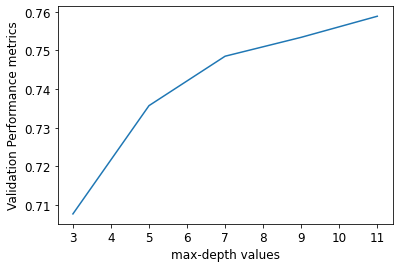

In [15]:
import matplotlib.pyplot as plt

plt.plot(parameters_tree_grid['max_depth'],
         grid_search.cv_results_['mean_test_score'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('max-depth values', fontsize=12)
plt.ylabel('Validation Performance metrics', fontsize=12)

plt.show()

##**9) Evaluate the Best Classifier on Test Set** *(15 pts)*

- Predict the labels of testing data. **Note that grid search cv function will return you the best estimator, so you can use directly the fitted function to make your predictions** and report the accuracy. 

In [16]:
# test prediction using a decision tree with all default parameters and ..... min-split value 
#y_pred = clf.predict(X_train)

y_pred = grid_search.predict(X_test)

# Report your accuracy
from sklearn.metrics import accuracy_score # you can find your scoring metric in this library
acc = accuracy_score(y_test, y_pred)

print("accuracy: ", acc)


accuracy:  0.750375939849624


##**10) Submission**

Name this notebook as: **YourName_Surname_hw1.ipynb** from the top left corner (e.g. for Özgür Can Seçkin -> Ozgur_Can_Seckin_hw1.ipynb)
Next, download this notebook as a *.ipynb document and upload* it on SuCourse. Also, click on the **"Share"** button on the top right hand side of the page and swicth from **"restricted" to "Anyone with the Link"** under the **"Get Link"** title. Then, **copy the link and paste it on the assignment's comment.**

If necessary, see the first recitation under Week 4 to get a tutorial on how to share your Colab link and how to download the .ipynb file.

## Questions? 

You can and should ask all your Google Colab related questions under Forums  and feel free to answer/share your answer regarding Colab. 

You can also ask/answer about which functions to use and what libraries... 

However you should **not ask** about the core parts, that is what is validation/test, which one shd. have higher performance, what are your scores etc.
